In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Utilities import *

In [2]:
df = pd.read_hdf("/storage/shared/data/2lep_df_forML.hdf5")
df = pd.concat([df,pd.read_hdf("/storage/shared/data/2lep_df_forML_signal.hdf5")])
print(df.keys())

Index(['lep_pt1', 'lep_eta1', 'lep_phi1', 'lep_E1', 'lep_pt2', 'lep_eta2',
       'lep_phi2', 'lep_E2', 'met', 'mll', 'njet20', 'njet60', 'nbjet60',
       'nbjet70', 'nbjet77', 'nbjet80', 'isSF', 'isOS', 'weight', 'category',
       'isSignal'],
      dtype='object')


In [3]:
otherCategories = ['Higgs', 'Wjets' ,'Wjetsincl', 'Zjets', 'Zjetsincl', 'topX']
for cat in otherCategories:
    df.loc[df["category"] == cat,"category"] = "Other"

In [4]:
cats_b = df[df['isSignal'] == 0]["category"].unique()
cats = np.append(cats_b,"SUSYSlepSlep")
print(cats)

['Diboson' 'Other' 'singleTop' 'ttbar' 'SUSYSlepSlep']


In [5]:

df_pt1 = []
df_pt2 = []
df_mep = []
df_mll = []
nr_events = []

for i in range(len(cats)):
    df_cat = df[df["category"] == cats[i]]
    df_pt1.append(df_cat["lep_pt1"].ravel())
    df_pt2.append(df_cat["lep_pt2"].ravel())
    df_mep.append(df_cat["met"].ravel())
    df_mll.append(df_cat["mll"].ravel())
    nr_events.append(len(df_cat))

sort_indx = sorted(range(len(nr_events)), key=lambda k: nr_events[k])


df_pt1 = [df_pt1[i] for i in sort_indx]
df_pt2 = [df_pt2[i] for i in sort_indx]
df_mep = [df_mep[i] for i in sort_indx]
df_mll = [df_mll[i] for i in sort_indx]
cats = [cats[i] for i in sort_indx]


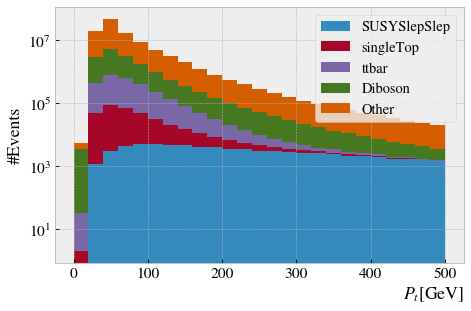

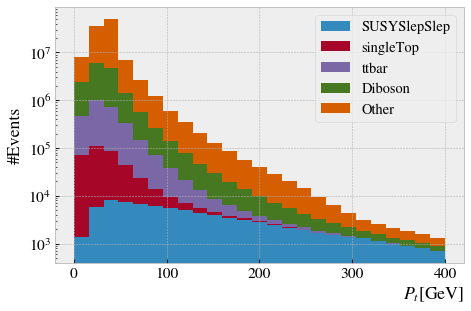

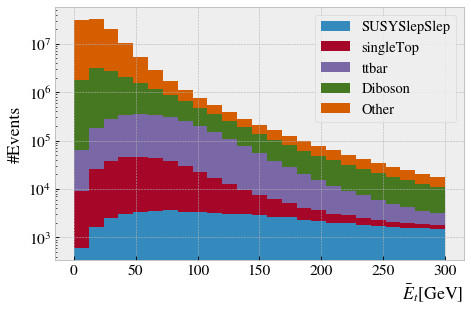

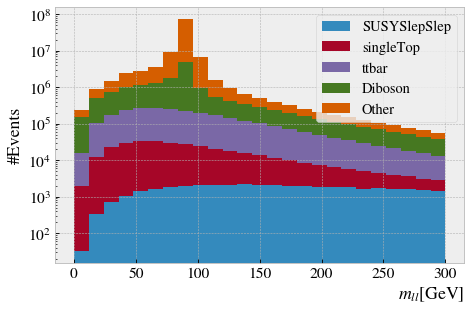

In [8]:
fig = plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.yscale("log")
plt.hist(df_pt1, bins = 25, range=(0,500), histtype = "barstacked", stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("p_t1.pdf")
plt.show()

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$P_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_pt2, bins = 25, range=(0,400), stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("p_t2.pdf")
plt.show()

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$\bar{E}_t$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mep, bins = 25, range=(0,300), stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("MET.pdf")
plt.show()

plt.figure(num=0, dpi=80, facecolor='w', edgecolor='k')
plt.yscale("log")
plt.xlabel(r"$m_{ll}$[GeV]", fontsize=16, loc = "right")
plt.ylabel("#Events", fontsize=16)
plt.hist(df_mll, bins = 25, range=(0,300), stacked = True, label = cats)
plt.legend(fontsize=13)
plt.tight_layout(pad=1.1, w_pad=0.7, h_pad=0.2)
plt.savefig("mll.pdf")
plt.show()